<a href="https://colab.research.google.com/github/vmr1532/kaggle-projects/blob/master/mnistpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [3]:
!pip install kaggle


In [4]:
!kaggle competitions download -c digit-recognizer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

 83% 61.0M/73.2M [00:00<00:00, 57.3MB/s]
100% 73.2M/73.2M [00:00<00:00, 94.0MB/s]
 90% 44.0M/48.8M [00:00<00:00, 69.5MB/s]
100% 48.8M/48.8M [00:00<00:00, 140MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 72.4MB/s]


In [0]:
!kaggle competitions download -c digit-recognizer

404 - Not Found


In [0]:


import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas

In [0]:
import csv
import numpy
train1=pandas.read_csv("train.csv")
test1=pandas.read_csv("test.csv")

In [7]:
print(train1.shape)
print(train1.info())
train1.head()


(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = numpy.asarray(train1.drop('label',axis=1),dtype=numpy.float32).reshape(-1,28,28)
yhat = numpy.asarray(train1['label'])

# Generate random indices for creating a random validation set with 20% of the labelled data
validx = (numpy.random.uniform(size=len(X)) <= 0.2)

# Create training set (80% of the labelled data)
X_trn = X[~validx]
y_trn = yhat[~validx]

# Create validation set (20% of the labelled data)
X_val = X[validx]
y_val = yhat[validx]

# Create the test set
X_tes = numpy.asarray(test1,dtype=numpy.float32).reshape(-1,28,28)

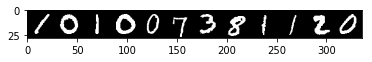

array([1, 0, 1, 0, 0, 7, 3, 8, 1, 1, 2, 0])

In [9]:
nvis = 12
plt.imshow(numpy.concatenate(X_trn[:nvis],axis=1),cmap='gray',vmin=0,vmax=255)
plt.show()

# Print the corresponding labels to check they match
y_trn[:nvis]

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import keras,numpy
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
model=Sequential()
model.add(Flatten()) #Since the dataloader outputs 28x28 images, flatten it to 784
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
y=model.fit(X_trn,keras.utils.to_categorical(y_trn, num_classes=10, dtype='int'), epochs=300, batch_size=128)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
33585/33585 [==============================] - 2s 59us/step - loss: 8.0218 - acc: 0.4960
Epoch 2/300
33585/33585 [==============================] - 1s 39us/step - loss: 5.0284 - acc: 0.6821
Epoch 3/300
33585/33585 [==============================] - 1s 38us/step - loss: 4.6260 - acc: 0.7082
Epoch 4/300
33585/33585 [==============================] - 1s 37us/step - loss: 4.4403 - acc: 0.7207
Epoch 5/300
33585/33585 [==============================] - 1s 36us/step - loss: 4.3109 - acc: 0.7289
Epoch 6/300
33585/33585 [==============================] - 1s 36us/step - loss: 3.6397 - acc: 0.7702
Epoch 7/300
33585/33585 [==============================] - 1s 35us/step - loss: 2.4884 - acc: 0.8413
Epoch 8/300
33585/33585 [==============================] - 1s 35us/step - loss: 2.4022 - acc: 0.8471
Epoch 9/300
33585/33585 [==============================] - 1s 36us/step 

TypeError: ignored

In [17]:
import numpy as np
predictions = model.predict(X_tes)
output = np.argmax(predictions,axis=1)
print(output)

[2 0 9 ... 3 9 2]


In [0]:
sub = pandas.DataFrame({"ImageId":numpy.arange(1,28001),"Label":output})
sub.to_csv("sub.csv",index=False)

In [16]:
!kaggle competitions submit -c digit-recognizer -f sub.csv -m "submission2"

100% 208k/208k [00:03<00:00, 63.1kB/s]
Successfully submitted to Digit Recognizer